In [4]:
skin_types = {
    1042: ["Male", 2], # asian
    1172: ["Male", 2], # asian
    1302: ["Female", 2], # asian
    132: ["Male", 3],
    1562: ["Male", 3],
    1692: ["Female", 3],
    1952: ["Male", 3], # blue cap
    2: ["Male", 2],
    2082: ["Male", 5],
    2212: ["Male", 3],
    2342: ["Female", 3],
    2472: ["Female", 4],
    2602: ["Female", 2], #asian
    262: ["Male", 5], #asian
    2732: ["Female", 2],
    2862: ["Female", 4],
    2992: ["Female", 2],
    3122: ["Female", 3],
    3382: ["Male", 3],
    3512: ["Female", 3],
    3642: ["Female", 1],
    3772: ["Male", 1],
    3642: ["Female", 3],
    524: ["Female", 4],
    652: ["Female", 4],
    782: ["Female", 2], # asian
    912: ["Male", 2]
}

In [5]:
len(skin_types)

26

In [8]:
import sys
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/"]
import helper

In [10]:
import cv2 as cv
x = helper.get_test_images()[0]


In [11]:
h,w,_ = x.shape
y = cv.resize(x, h//2, w//2)

SystemError: new style getargs format but argument is not a tuple

In [36]:
scale = 10
y = cv.resize(x, (int(w//scale),int(h//scale)), interpolation = cv.INTER_AREA)
# y = cv.resize(x, (int(w//scale),int(h//scale)))

In [38]:
import numpy as np
print(np.mean(x.reshape(h*w,3), axis = 0))
print(np.mean(y.reshape((h//scale)*(w//scale),3), axis = 0))

[107.77371981  99.42937198  79.43189614]
[107.77777778  99.43357488  79.4331723 ]


In [33]:
cv.imshow(x)

TypeError: imshow() missing required argument 'mat' (pos 2)

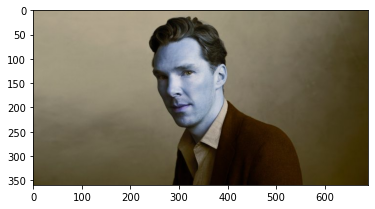

In [41]:
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(x)

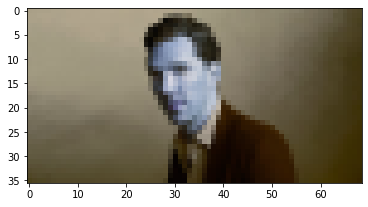

In [42]:
plt.imshow(y)

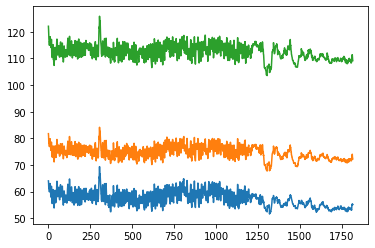

In [43]:
ppg = np.loadtxt("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/1.5_jog_1-RepeatedDetector-DNNDetector-BayesianSkinDetector-weighted-fixed.csv")
plt.plot(ppg)

In [66]:
int(len(ppg)//(true_fs/fs))

908

In [78]:
fs = 15
true_fs = 30
ups = np.zeros(shape=(int(len(ppg)//(true_fs/fs)+1), 3))
for i in range(3):
    ups[:,i] = np.interp(np.arange(0, len(ppg), true_fs/fs), np.arange(0, len(ppg)), ppg[:,i])

In [53]:
np.arange(0, len(ppg)//true_fs, 1/true_fs).shape

(1800,)

In [48]:
ppg[:,0].shape

(1817,)

In [79]:
1200*true_fs/fs


2400.0

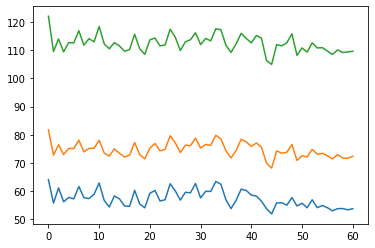

In [76]:
plt.plot(ups)